In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
experiment = "RNAs_z_Combat"
comparison = 'young.vs.old'

In [3]:
adata = pd.read_csv(f'/home/amore/work/data/{experiment}.csv')
adata

,Sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,...,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age
0,SRR13388732,-0.025109,-0.028258,-0.005872,-0.026729,-0.026472,-0.027634,-0.020870,-0.022772,-0.022661,...,-0.028169,-0.028120,-0.028027,-0.027546,-0.028289,-0.028272,-0.024716,-0.028265,GSE164471,23.0
1,SRR13388733,-0.026260,-0.033508,-0.004524,-0.028312,-0.031995,-0.032750,-0.016343,-0.026733,-0.023806,...,-0.033510,-0.033522,-0.033509,-0.032635,-0.033518,-0.033482,-0.020903,-0.032705,GSE164471,28.0
2,SRR13388734,-0.030608,-0.037952,-0.002987,-0.034886,-0.029932,-0.038745,-0.014741,-0.030696,-0.027022,...,-0.038155,-0.039709,-0.039524,-0.038657,-0.039251,-0.039648,-0.036926,-0.038901,GSE164471,31.0
3,SRR13388735,-0.021728,-0.024309,-0.004225,-0.022910,-0.023840,-0.024011,-0.019799,-0.021443,-0.022365,...,-0.024390,-0.024440,-0.024351,-0.023795,-0.024435,-0.024431,-0.021008,-0.024095,GSE164471,31.0
4,SRR13388736,-0.019503,-0.034629,-0.004944,-0.031244,-0.026323,-0.034354,-0.021341,-0.015501,-0.017102,...,-0.034285,-0.033820,-0.034226,-0.033922,-0.035173,-0.035132,-0.031649,-0.034687,GSE164471,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SRR8882198,-0.019750,-0.021331,-0.005098,-0.020260,-0.021419,-0.020946,-0.018419,-0.019666,-0.019176,...,-0.021333,-0.021377,-0.021335,-0.020852,-0.021341,-0.021372,-0.020049,-0.021263,GSE129643,27.0
266,SRR8882200,-0.017618,-0.019354,-0.003957,-0.018234,-0.019187,-0.019024,-0.016646,-0.017455,-0.018713,...,-0.019334,-0.019429,-0.019360,-0.018994,-0.019396,-0.019424,-0.018100,-0.019367,GSE129643,33.0
267,SRR8882202,-0.018818,-0.020237,-0.003773,-0.018901,-0.020455,-0.019962,-0.016610,-0.018502,-0.018296,...,-0.020258,-0.020326,-0.020308,-0.019834,-0.020319,-0.020318,-0.018674,-0.020279,GSE129643,37.0
268,SRR8882203,-0.017649,-0.018998,-0.003477,-0.017604,-0.019472,-0.018760,-0.016018,-0.017490,-0.017853,...,-0.018996,-0.019074,-0.019036,-0.018651,-0.019067,-0.019071,-0.017318,-0.019013,GSE129643,38.0


In [4]:
adata = adata.set_index('Sample')
age_series = adata['Age']
adata

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.025109,-0.028258,-0.005872,-0.026729,-0.026472,-0.027634,-0.020870,-0.022772,-0.022661,-0.025610,...,-0.028169,-0.028120,-0.028027,-0.027546,-0.028289,-0.028272,-0.024716,-0.028265,GSE164471,23.0
SRR13388733,-0.026260,-0.033508,-0.004524,-0.028312,-0.031995,-0.032750,-0.016343,-0.026733,-0.023806,-0.026443,...,-0.033510,-0.033522,-0.033509,-0.032635,-0.033518,-0.033482,-0.020903,-0.032705,GSE164471,28.0
SRR13388734,-0.030608,-0.037952,-0.002987,-0.034886,-0.029932,-0.038745,-0.014741,-0.030696,-0.027022,-0.031814,...,-0.038155,-0.039709,-0.039524,-0.038657,-0.039251,-0.039648,-0.036926,-0.038901,GSE164471,31.0
SRR13388735,-0.021728,-0.024309,-0.004225,-0.022910,-0.023840,-0.024011,-0.019799,-0.021443,-0.022365,-0.022526,...,-0.024390,-0.024440,-0.024351,-0.023795,-0.024435,-0.024431,-0.021008,-0.024095,GSE164471,31.0
SRR13388736,-0.019503,-0.034629,-0.004944,-0.031244,-0.026323,-0.034354,-0.021341,-0.015501,-0.017102,-0.031354,...,-0.034285,-0.033820,-0.034226,-0.033922,-0.035173,-0.035132,-0.031649,-0.034687,GSE164471,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,-0.019750,-0.021331,-0.005098,-0.020260,-0.021419,-0.020946,-0.018419,-0.019666,-0.019176,-0.019744,...,-0.021333,-0.021377,-0.021335,-0.020852,-0.021341,-0.021372,-0.020049,-0.021263,GSE129643,27.0
SRR8882200,-0.017618,-0.019354,-0.003957,-0.018234,-0.019187,-0.019024,-0.016646,-0.017455,-0.018713,-0.018467,...,-0.019334,-0.019429,-0.019360,-0.018994,-0.019396,-0.019424,-0.018100,-0.019367,GSE129643,33.0
SRR8882202,-0.018818,-0.020237,-0.003773,-0.018901,-0.020455,-0.019962,-0.016610,-0.018502,-0.018296,-0.018516,...,-0.020258,-0.020326,-0.020308,-0.019834,-0.020319,-0.020318,-0.018674,-0.020279,GSE129643,37.0


In [5]:
ensembl_names = adata.columns
ensembl_names = ensembl_names.to_list()
ensembl_names[:5]

['ENSG00000000003.14',
 'ENSG00000000005.5',
 'ENSG00000000419.12',
 'ENSG00000000457.13',
 'ENSG00000000460.16']

In [6]:
# Retrieve gene symbols
annot = sc.queries.biomart_annotations("hsapiens",
        ["ensembl_gene_id", "external_gene_name"],
        use_cache=False
    ).set_index("ensembl_gene_id")


In [7]:
ensembl_names = [item for item in ensembl_names if item.split('.')[0] in annot.index]


In [8]:
adata = adata[ensembl_names]
adata

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285446.1,ENSG00000285458.1,ENSG00000285470.1,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.025109,-0.028258,-0.005872,-0.026729,-0.026472,-0.027634,-0.020870,-0.022772,-0.022661,-0.025610,...,-0.028198,-0.022667,-0.028200,-0.028169,-0.028120,-0.027546,-0.028289,-0.028272,-0.024716,-0.028265
SRR13388733,-0.026260,-0.033508,-0.004524,-0.028312,-0.031995,-0.032750,-0.016343,-0.026733,-0.023806,-0.026443,...,-0.033468,-0.029636,-0.033490,-0.033510,-0.033522,-0.032635,-0.033518,-0.033482,-0.020903,-0.032705
SRR13388734,-0.030608,-0.037952,-0.002987,-0.034886,-0.029932,-0.038745,-0.014741,-0.030696,-0.027022,-0.031814,...,-0.039636,-0.017213,-0.039438,-0.038155,-0.039709,-0.038657,-0.039251,-0.039648,-0.036926,-0.038901
SRR13388735,-0.021728,-0.024309,-0.004225,-0.022910,-0.023840,-0.024011,-0.019799,-0.021443,-0.022365,-0.022526,...,-0.024417,-0.023151,-0.024434,-0.024390,-0.024440,-0.023795,-0.024435,-0.024431,-0.021008,-0.024095
SRR13388736,-0.019503,-0.034629,-0.004944,-0.031244,-0.026323,-0.034354,-0.021341,-0.015501,-0.017102,-0.031354,...,-0.035119,-0.006095,-0.035141,-0.034285,-0.033820,-0.033922,-0.035173,-0.035132,-0.031649,-0.034687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,-0.019750,-0.021331,-0.005098,-0.020260,-0.021419,-0.020946,-0.018419,-0.019666,-0.019176,-0.019744,...,-0.021303,-0.021537,-0.021382,-0.021333,-0.021377,-0.020852,-0.021341,-0.021372,-0.020049,-0.021263
SRR8882200,-0.017618,-0.019354,-0.003957,-0.018234,-0.019187,-0.019024,-0.016646,-0.017455,-0.018713,-0.018467,...,-0.019413,-0.020217,-0.019402,-0.019334,-0.019429,-0.018994,-0.019396,-0.019424,-0.018100,-0.019367
SRR8882202,-0.018818,-0.020237,-0.003773,-0.018901,-0.020455,-0.019962,-0.016610,-0.018502,-0.018296,-0.018516,...,-0.020307,-0.021337,-0.020318,-0.020258,-0.020326,-0.019834,-0.020319,-0.020318,-0.018674,-0.020279


In [9]:
ensembl_names = [element.split('.')[0] for element in ensembl_names]


In [10]:
# Assign gene symbols
adata.columns = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]
adata['Age'] = age_series
adata

/tmp/ipykernel_1531/2025391457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata['Age'] = age_series


,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,C4orf36,TUSC2P1,NaN,OR4M2-OT1,H2BK1,OR1Q1BP,NaN,NaN,TBCEL-TECTA,Age
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.025109,-0.028258,-0.005872,-0.026729,-0.026472,-0.027634,-0.020870,-0.022772,-0.022661,-0.025610,...,-0.022667,-0.028200,-0.028169,-0.028120,-0.027546,-0.028289,-0.028272,-0.024716,-0.028265,23.0
SRR13388733,-0.026260,-0.033508,-0.004524,-0.028312,-0.031995,-0.032750,-0.016343,-0.026733,-0.023806,-0.026443,...,-0.029636,-0.033490,-0.033510,-0.033522,-0.032635,-0.033518,-0.033482,-0.020903,-0.032705,28.0
SRR13388734,-0.030608,-0.037952,-0.002987,-0.034886,-0.029932,-0.038745,-0.014741,-0.030696,-0.027022,-0.031814,...,-0.017213,-0.039438,-0.038155,-0.039709,-0.038657,-0.039251,-0.039648,-0.036926,-0.038901,31.0
SRR13388735,-0.021728,-0.024309,-0.004225,-0.022910,-0.023840,-0.024011,-0.019799,-0.021443,-0.022365,-0.022526,...,-0.023151,-0.024434,-0.024390,-0.024440,-0.023795,-0.024435,-0.024431,-0.021008,-0.024095,31.0
SRR13388736,-0.019503,-0.034629,-0.004944,-0.031244,-0.026323,-0.034354,-0.021341,-0.015501,-0.017102,-0.031354,...,-0.006095,-0.035141,-0.034285,-0.033820,-0.033922,-0.035173,-0.035132,-0.031649,-0.034687,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,-0.019750,-0.021331,-0.005098,-0.020260,-0.021419,-0.020946,-0.018419,-0.019666,-0.019176,-0.019744,...,-0.021537,-0.021382,-0.021333,-0.021377,-0.020852,-0.021341,-0.021372,-0.020049,-0.021263,27.0
SRR8882200,-0.017618,-0.019354,-0.003957,-0.018234,-0.019187,-0.019024,-0.016646,-0.017455,-0.018713,-0.018467,...,-0.020217,-0.019402,-0.019334,-0.019429,-0.018994,-0.019396,-0.019424,-0.018100,-0.019367,33.0
SRR8882202,-0.018818,-0.020237,-0.003773,-0.018901,-0.020455,-0.019962,-0.016610,-0.018502,-0.018296,-0.018516,...,-0.021337,-0.020318,-0.020258,-0.020326,-0.019834,-0.020319,-0.020318,-0.018674,-0.020279,37.0


In [11]:
adata.to_csv(f'/home/amore/work/data/{experiment}_gene_symbol_expression.csv')

In [12]:
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 270 × 34334

In [13]:
adata.obs.index

Index(['SRR13388732', 'SRR13388733', 'SRR13388734', 'SRR13388735',
       'SRR13388736', 'SRR13388737', 'SRR13388738', 'SRR13388739',
       'SRR13388740', 'SRR13388741',
       ...
       'SRR8882190', 'SRR8882191', 'SRR8882192', 'SRR8882195', 'SRR8882196',
       'SRR8882198', 'SRR8882200', 'SRR8882202', 'SRR8882203', 'SRR8882219'],
      dtype='object', name='Sample', length=270)

In [14]:
# Process treatment information
adata.obs['condition'] = age_series.apply(lambda age: 'young' if age < 35 else ('old' if age >= 65 else 'middle'))

# Visualize metadata
adata.obs

,condition
Sample,
SRR13388732,young
SRR13388733,young
SRR13388734,young
SRR13388735,young
SRR13388736,middle
...,...
SRR8882198,young
SRR8882200,young
SRR8882202,middle


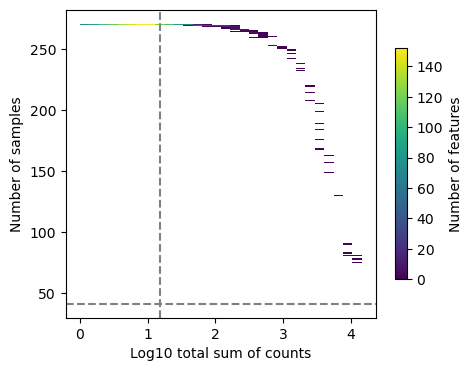

In [15]:
dc.plot_filter_by_expr(adata, group='condition', min_count=10, min_total_count=15, large_n=1, min_prop=1)


In [16]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group='condition', min_count=10, min_total_count=15, large_n=1, min_prop=1)

# Filter by these genes
adata = adata[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 270 × 600
    obs: 'condition'

In [17]:
from pydeseq2.dds import DeseqDataSet, DefaultInference
from pydeseq2.ds import DeseqStats

In [18]:
# Build DESeq2 object
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    inference=inference,
)

ValueError: The count matrix should only contain integers.

In [ ]:
results_df =  pd.read_csv(f'/home/amore/work/data/{experiment}.csv')
results_df = results_df.set_index('row')
results_df.drop(columns=['Unnamed: 0'],inplace=True)
results_df.index.name = 'GeneName'
results_df

In [ ]:
results_df.to_csv(f'/home/amore/work/data/{experiment}_gene_symbol.csv')

In [ ]:
results_df = results_df.set_index('gene_symbol')
results_df.index.name = 'GeneName'
results_df

In [ ]:
def make_index_unique(df):
    # Create a dictionary to keep track of the counts
    counts = {}
    
    def unique_index(index):
        if index in counts:
            counts[index] += 1
            return f"{index}_{counts[index]}"
        else:
            counts[index] = 0
            return index
    
    # Apply the unique_index function to each index value
    new_index = [unique_index(idx) for idx in df.index]
    df.index = new_index


In [ ]:
results_df = results_df[results_df.index.notnull()]
results_df

In [ ]:

make_index_unique(results_df)

In [ ]:
results_df = results_df.dropna()
results_df

In [ ]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=10,
    figsize=(5, 5)
)

In [ ]:
mat = results_df[['stat']].T.rename(index={'stat': comparison})
mat

In [ ]:
collectri = dc.get_collectri(organism='human', split_complexes=False)
collectri

In [ ]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

In [ ]:
values = tf_acts.iloc[0]
values

In [ ]:
down_reg = values.sort_values(ascending=True)[:5].index.to_list()

In [ ]:
up_reg = values.sort_values(ascending=False)[:5].index.to_list()

In [ ]:
up_down_reg = down_reg.copy()

In [ ]:
up_down_reg.extend(up_reg)
up_down_reg

In [ ]:
dc.plot_barplot(
    acts=tf_acts,
    contrast=comparison,
    top=10,
    vertical=True,
    figsize=(3, 3)
)

In [ ]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=up_down_reg,
    n_targets=5,
    node_size=50,
    figsize=(5, 5),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save=f'/home/amore/work/figures/{experiment}_network_TF.jpg'
)

In [ ]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': comparison})
pvals = results_df[['padj']].T.rename(index={'padj': comparison})

# Plot
dc.plot_volcano(
    logFCs,
    pvals,
    comparison,
    name='MYC',
    net=collectri,
    top=10,
    sign_thr=0.05,
    lFCs_thr=0.5
)

In [ ]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

In [ ]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

In [ ]:
dc.plot_barplot(
    pathway_acts,
    comparison,
    top=25,
    vertical=False,
    figsize=(6, 3)
)

In [ ]:
dc.plot_targets(results_df, stat='stat', source_name='TGFb', net=progeny, top=15)


In [ ]:
dc.plot_targets(results_df, stat='stat', source_name='PI3K', net=progeny, top=15)


In [ ]:
msigdb = dc.get_resource('MSigDB')
msigdb

In [ ]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

In [ ]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

In [ ]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=0.5,
    figsize=(3, 10)
)

In [ ]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='TNFA_SIGNALING_VIA_NFKB'
)

In [ ]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='MYOGENESIS'
)

In [ ]:
import liana as ln

liana_lr = ln.resource.select_resource()
liana_lr = ln.resource.explode_complexes(liana_lr)

# Create two new DataFrames, each containing one of the pairs of columns to be concatenated
df1 = liana_lr[['interaction', 'ligand']]
df2 = liana_lr[['interaction', 'receptor']]

# Rename the columns in each new DataFrame
df1.columns = ['interaction', 'genes']
df2.columns = ['interaction', 'genes']

# Concatenate the two new DataFrames
liana_lr = pd.concat([df1, df2], axis=0)
liana_lr['weight'] = 1

# Find duplicated rows
duplicates = liana_lr.duplicated()

# Remove duplicated rows
liana_lr = liana_lr[~duplicates]

liana_lr

In [ ]:
# Infer lr activities with ulm
lr_score, lr_pvalue = dc.run_ulm(
    mat=mat,
    net=liana_lr,
    source='interaction',
    target='genes',
    min_n=2,
    verbose=True
)

In [ ]:
dc.plot_barplot(lr_score, comparison, top=25, vertical=True)
